In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt


In [2]:
def EllipDrone(y_init, a_max, lx,hx,P,X,eps):
    T=len(lx)
    it=0
    Xlist,fblist,normlist,Plist,felist=[],[],[],[],[]
    fb=99999.0
    XO=X
    Xlist.append(X)
    Plist.append(P)
    while True:
        fe=1
        index=np.array([-1,-1],dtype=int)
        tempa=0.0
        f=0.0
        for t in range(T):
            for j in range(t):
                tempa+=X[j]
            if t<T-1:
                if X[t]<0:
                    fe=-1
                    index[0]=t
                    index[1]=1
                    f=-X[t]
                    break
                elif X[t]>a_max:
                    fe=-1
                    index[0]=t
                    index[1]=2
                    f=X[t]-a_max
                    break
            if tempa-9.8*(t+1)*t/2+y_init<lx[t]:
                fe=-1
                index[0]=t
                index[1]=3
                f=-tempa+9.8*(t+1)*t/2-y_init+lx[t]
                break
            elif tempa-9.8*(t+1)*t/2+y_init>hx[t]:
                fe=-1
                index[0]=t
                index[1]=4
                f=tempa-9.8*(t+1)*t/2+y_init-hx[t]
                break
        felist.append(fe)
        if fe==-1:
            g=np.zeros(T-1)
            if index[1]==1:
                g[int(index[0])]=-1
            elif index[1]==2:
                g[int(index[0])]=1
            elif index[1]==3:
                for j in range(int(index[0])):
                    g[j]=j-index[0]
            elif index[1]==4:
                for j in range(int(index[0])):
                    g[j]=index[0]-j
            norm=sqrt(np.matmul(g,np.matmul(P,g)))
            g=g/norm
            alpha=f/norm
        else:
            g=np.zeros(T-1)
            fo=0.0
            for i in range(T-1):
                g[i]=1+2*X[i]+3*X[i]**2
                fo+=X[i]**3+X[i]**2+X[i]+1
            norm=sqrt(np.matmul(g,np.matmul(P,g)))
            g=g/norm
            if fo<=fb:
                XO=X
                fb=fo
            alpha=(fo-fb)/norm
        fblist.append(fb)
        normlist.append(norm)
        if (fe==1) and (norm<=eps):
            break
        X=np.subtract(X,np.matmul(P,g)*(1+(T-1)*alpha)/(T))
        P=np.subtract(P,np.outer(np.matmul(P,g),np.matmul(g,P))*2*(1+(T-1)*alpha)/(1+alpha)/(T))*(T-1)**2*(1-alpha**2)/((T-1)**2-1)
        Xlist.append(X)
        Plist.append(P)
        it+=1
    return XO,it, Xlist, Plist,normlist,fblist,felist
            
        

In [41]:
instance=np.load('2d_instance.npz',allow_pickle=False)
y_init=float(instance['y_init'])
a_max=float(instance['a_max'])
hx=instance['hx']
lx=instance['lx']
eps=.001
T=len(lx)
X=np.zeros(T-1)
X.fill(a_max/2.0)
P=np.zeros((T-1,T-1))
for i in range(T-1):
    for j in range(T-1):
        if i==j:
            P[i][j]=(T-1)*a_max**2/4.0


In [42]:
Xf,It, XL, PL, NL, FbL, FeL=EllipDrone(y_init,a_max,lx,hx,P,X,eps)

In [43]:
FbL[-1]

589.2848310894037

In [44]:
Y=np.zeros(T)
V=np.zeros(T-1)
Y[0]=y_init
V[0]=Xf[0]-9.8
for i in range(1,T-1):
    V[i]=V[i-1]+Xf[i]-9.8
    Y[i]=Y[i-1]+V[i-1]
Y[T-1]=Y[T-2]+V[T-2]

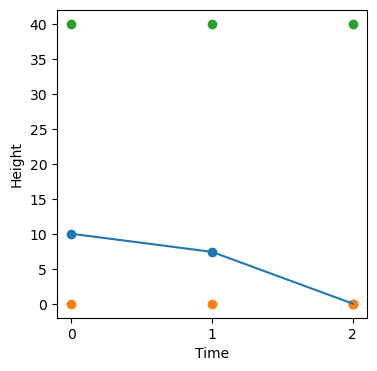

In [45]:
fig=plt.figure(num=1,figsize=(4,4))
plt.scatter(range(T),Y)
plt.plot(range(T),Y)
plt.scatter(range(T),lx)
plt.scatter(range(T),hx)
my_x_ticks = np.arange(0, 3, 1)
plt.xticks(my_x_ticks)
plt.xlabel("Time")
plt.ylabel("Height")
plt.savefig("2d_Y.jpg")
plt.show()

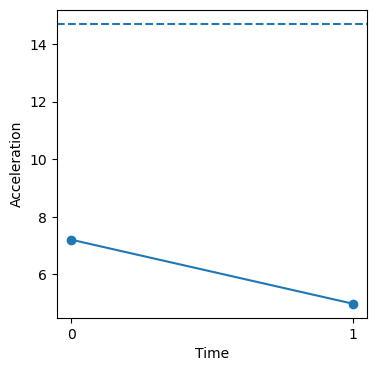

In [46]:
fig=plt.figure(num=1,figsize=(4,4))
plt.scatter(range(T-1),Xf)
plt.plot(range(T-1),Xf)
plt.axhline(a_max, linestyle='--')
my_x_ticks = np.arange(0, 2, 1)
plt.xticks(my_x_ticks)
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.savefig("2d_A.jpg")
plt.show()

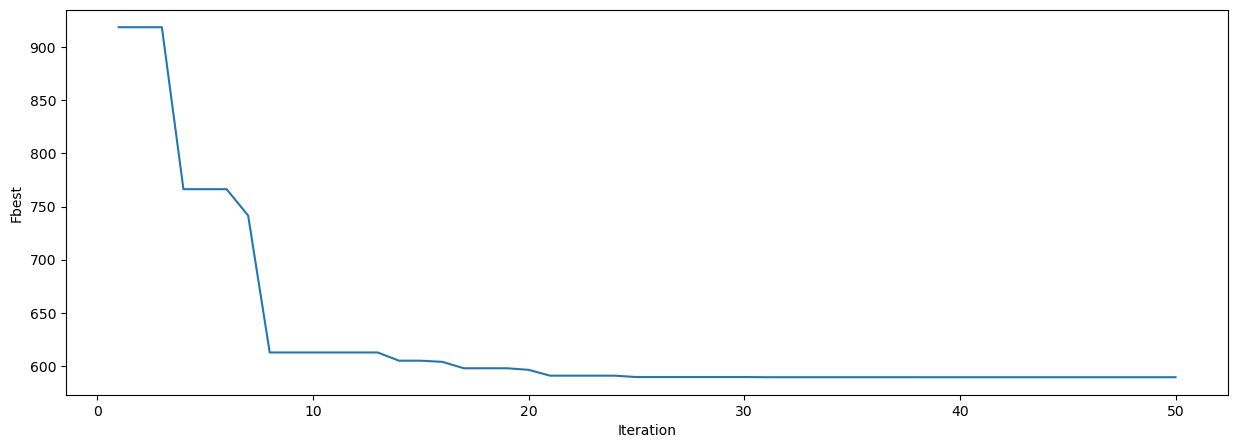

In [47]:
fig=plt.figure(num=1,figsize=(15,5))
# plt.scatter(range(1,It+2),FbL)
plt.plot(range(1,It+2),FbL)
plt.xlabel("Iteration")
plt.ylabel("Fbest")
plt.savefig("2d_fbest.jpg")
plt.show()

In [48]:
LB=[]
for i in range(It+1):
    if FeL[i] == 1:
        temp=0
        for j in range(T-1):
            temp+=XL[i][j]**3+XL[i][j]**2+XL[i][j]+1
        LB.append(temp-NL[i])
    else:
        LB.append(np.nan)

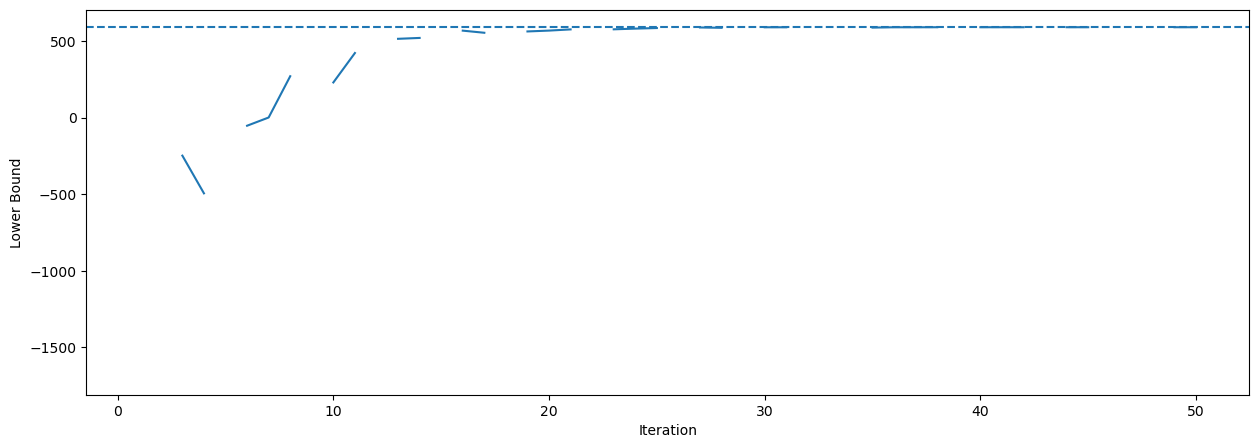

In [49]:
fig=plt.figure(num=1,figsize=(15,5))
# plt.scatter(range(1,It+2),FbL)
plt.plot(range(1,It+2),LB)
plt.axhline(FbL[-1], linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Lower Bound")
plt.savefig("2d_lowerbound.jpg")
plt.show()

In [50]:
instance=np.load('32d_instance.npz',allow_pickle=False)
y_init=float(instance['y_init'])
a_max=float(instance['a_max'])
hx=instance['hx']
lx=instance['lx']
eps=.1
T=len(lx)
X=np.zeros(T-1)
X.fill(a_max/2.0)
P=np.zeros((T-1,T-1))
for i in range(T-1):
    for j in range(T-1):
        if i==j:
            P[i][j]=(T-1)*a_max**2/4.0
Xf,It, XL, PL, NL, FbL, FeL=EllipDrone(y_init,a_max,lx,hx,P,X,eps)

In [51]:
Y=np.zeros(T)
V=np.zeros(T-1)
Y[0]=y_init
V[0]=Xf[0]-9.8
for i in range(1,T-1):
    V[i]=V[i-1]+Xf[i]-9.8
    Y[i]=Y[i-1]+V[i-1]
Y[T-1]=Y[T-2]+V[T-2]

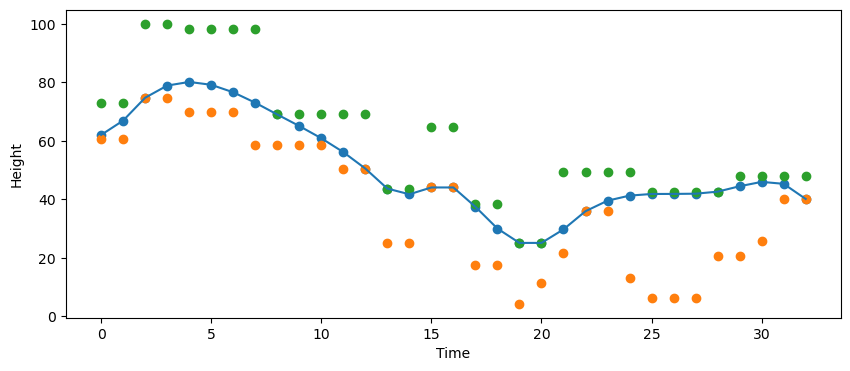

In [52]:
fig=plt.figure(num=1,figsize=(10,4))
plt.scatter(range(T),Y)
plt.scatter(range(T),lx)
plt.scatter(range(T),hx)
plt.plot(range(T),Y)
plt.xlabel("Time")
plt.ylabel("Height")
plt.savefig("32d_Y.jpg")
plt.show()

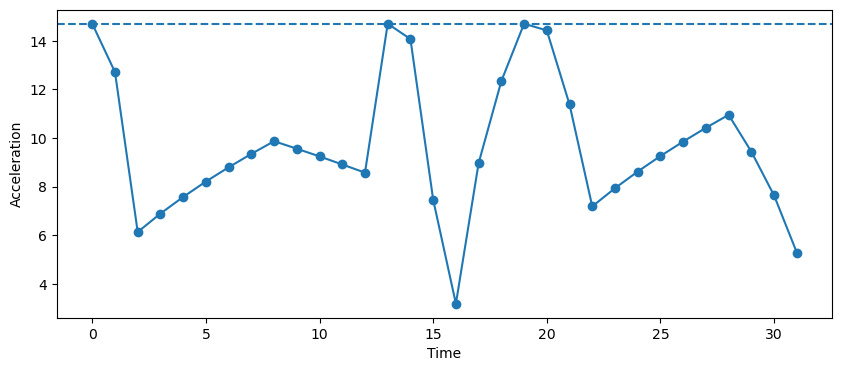

In [53]:
fig=plt.figure(num=1,figsize=(10,4))
plt.scatter(range(T-1),Xf)
plt.plot(range(T-1),Xf)
plt.axhline(a_max, linestyle='--')
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.savefig("32d_A.jpg")
plt.show()

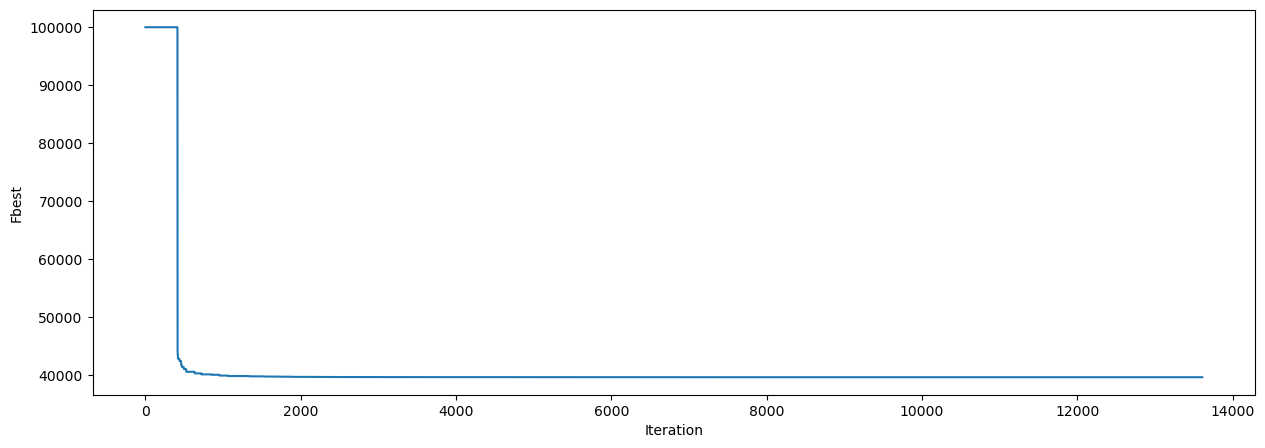

In [55]:
fig=plt.figure(num=1,figsize=(15,5))
# plt.scatter(range(1,It+2),FbL)
plt.plot(range(1,It+2),FbL)
plt.xlabel("Iteration")
plt.ylabel("Fbest")
plt.savefig("32d_fbest.jpg")
plt.show()

In [56]:
FbL[-1]

39619.23462724946

In [57]:
LB=[]
for i in range(It+1):
    if FeL[i] == 1:
        temp=0
        for j in range(T-1):
            temp+=XL[i][j]**3+XL[i][j]**2+XL[i][j]+1
        LB.append(temp-NL[i])
    else:
        LB.append(np.nan)

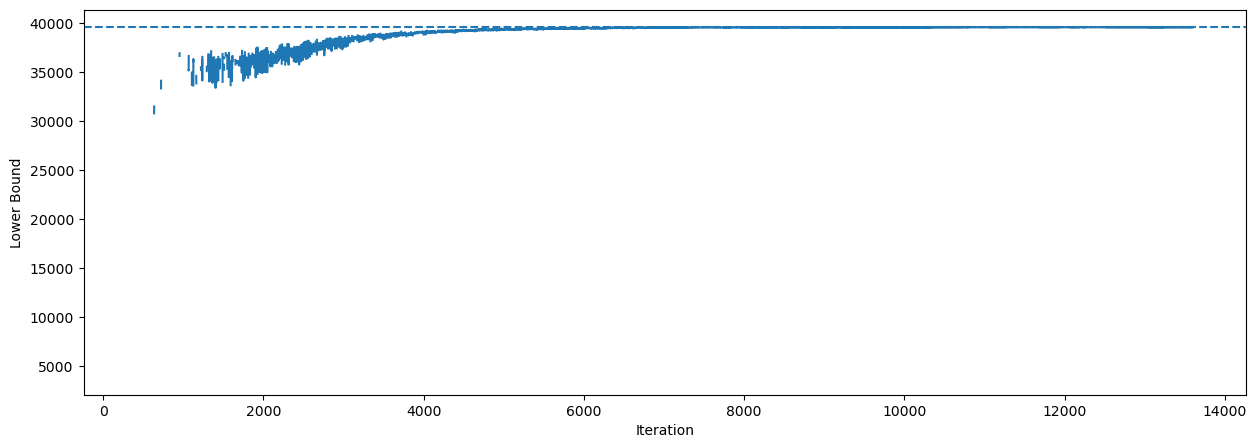

In [58]:
fig1=plt.figure(num=1,figsize=(15,5))
# plt.scatter(range(1,It+2),FbL)
plt.plot(range(1,It+2),LB)
plt.axhline(FbL[-1], linestyle='--')
plt.xlabel("Iteration")
plt.ylabel("Lower Bound")
plt.savefig("32d_lowerbound.jpg")
plt.show()